In [91]:
import h5py
import matplotlib.pyplot as plt
import h5py
import matplotlib.pyplot as plt
import numpy as np



In [92]:

file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'

with h5py.File(file_path, 'r') as file:
    # Print dataset names
    print("Dataset names:")
    for dataset_name in file:
        print(dataset_name)

Dataset names:
ismrmrd_header
kspace
reconstruction_rss


Shows a magnitude image

In [93]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def display_mri_image(file_path, dataset_name, slice_index=0, coil_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Select a specific slice for display
        selected_slice = mri_data[slice_index, coil_index]
        # Perform the inverse Fourier transform (IFFT)
        image_data = np.fft.ifftn(selected_slice)

        # Shift the zero-frequency component to the center
        shifted_image = np.fft.fftshift(image_data)

        # Display the magnitude of the complex MRI data
        magnitude_data = np.abs(shifted_image)
        plt.imshow(magnitude_data, cmap='gray')
        plt.title('MRI Image Magnitude')
        plt.axis('off')  # Turn off axis labels
        plt.show()



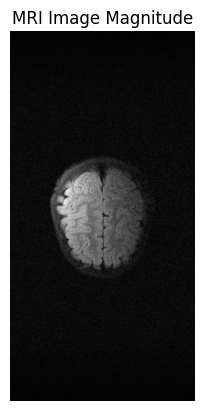

In [94]:
# Provide the path to your .h5 file and the dataset name
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'

dataset_name = 'kspace'

# Call the function to display the MRI image
display_mri_image(file_path, dataset_name, 10, 10)

Shows a phase image

In [95]:
def display_mri_image(file_path, dataset_name, slice_index=0, coil_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Select a specific slice for display
        selected_slice = mri_data[slice_index, coil_index]
        # Perform the inverse Fourier transform (IFFT)
        image_data = np.fft.ifftn(selected_slice)

        # Shift the zero-frequency component to the center
        shifted_image = np.fft.fftshift(image_data)

        # Compute the phase of the complex MRI data
        phase_data = np.angle(shifted_image)

        # Display the phase image
        plt.imshow(phase_data, cmap='gray')
        plt.title('MRI Image Phase')
        plt.axis('off')  # Turn off axis labels
        plt.show()

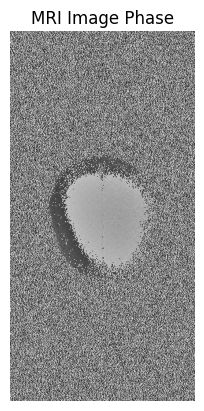

In [96]:
# Provide the path to your .h5 file and the dataset name
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'
dataset_name = 'kspace'

# Call the function to display the MRI image
display_mri_image(file_path, dataset_name, 10, 10)

Shows all 16 coils of the magnitude image

In [97]:
def display_mri_images(file_path, dataset_name, slice_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Determine the number of coils
        num_coils = mri_data.shape[0]

        # Create subplots for each slice
        num_rows = 4
        num_cols = num_coils // num_rows + (num_coils % num_rows > 0)
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

        # Loop through each coil and display it
        for i in range(num_coils):
            row = i // num_cols
            col = i % num_cols
            # Select a specific coil of a slice for display
            selected_slice = mri_data[slice_index, i]
            # Perform the inverse Fourier transform (IFFT)
            image_data = np.fft.ifftn(selected_slice)

            # Shift the zero-frequency component to the center
            shifted_image = np.fft.fftshift(image_data)
            mag_data = np.abs(shifted_image)
            axes[row, col].imshow(mag_data, cmap='gray')
            axes[row, col].set_title(f'Coil {i+1}')
            axes[row, col].axis('off')

        # Hide any empty subplots
        for i in range(num_coils, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.show()

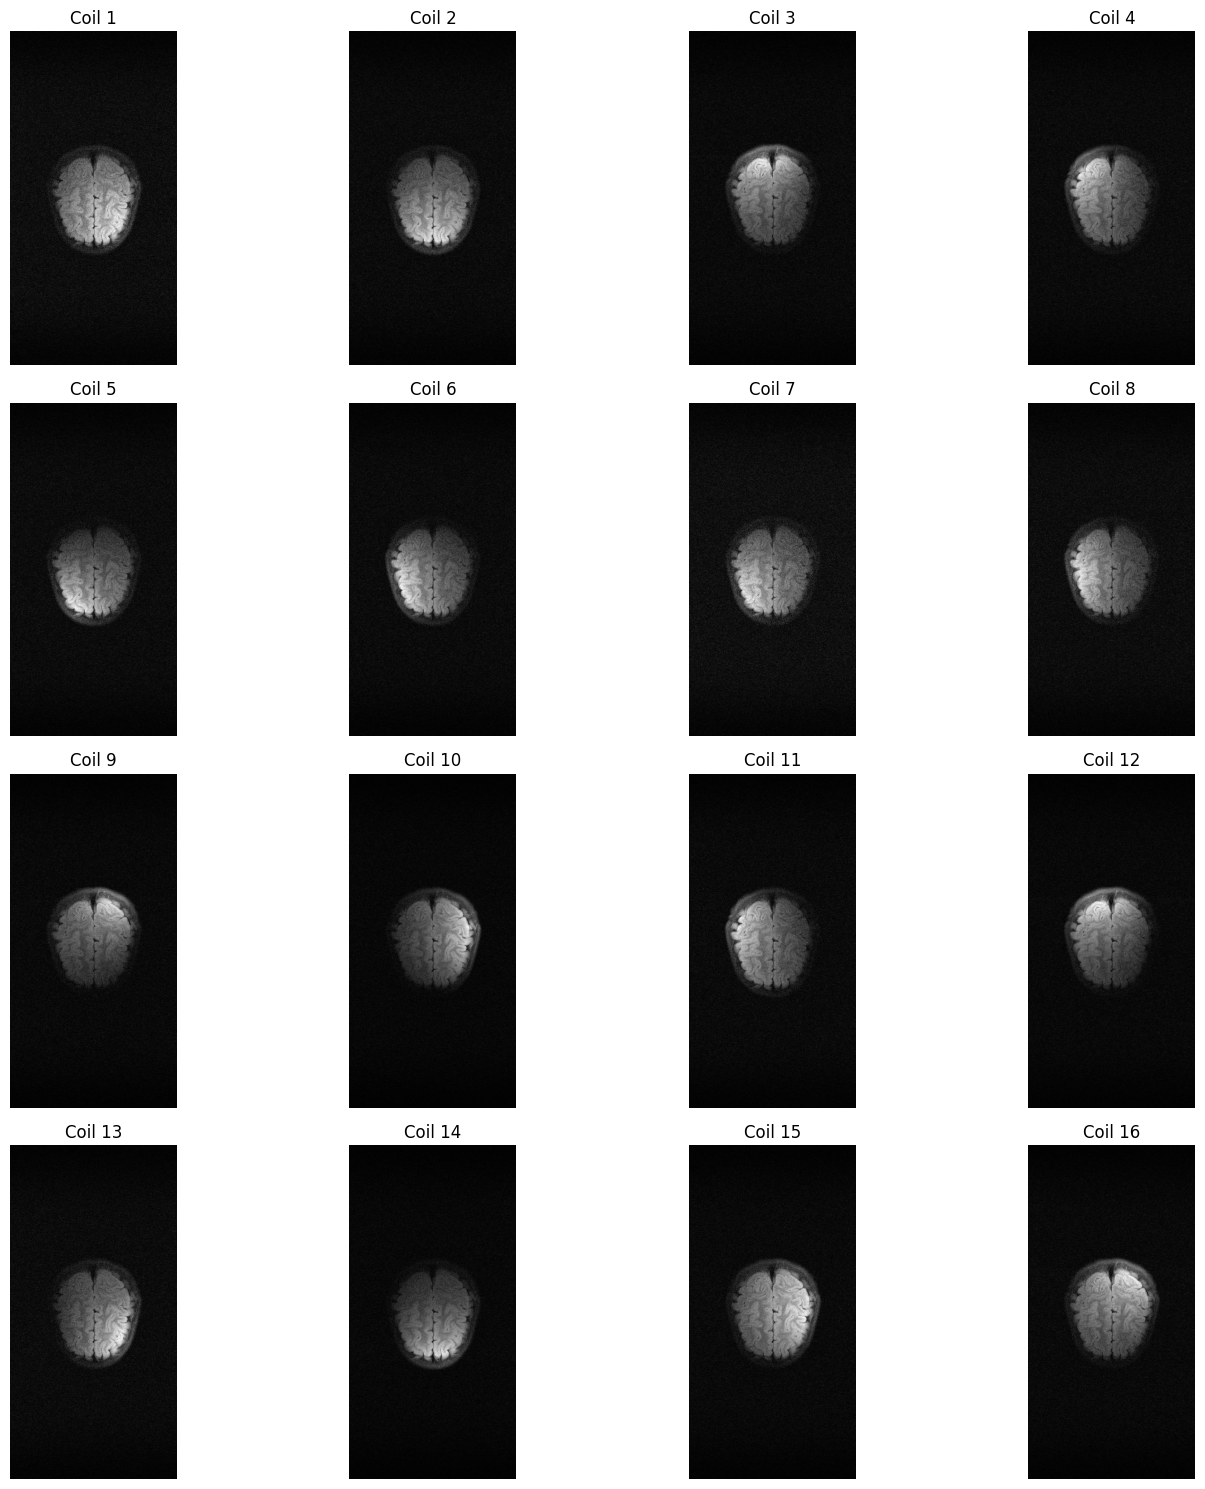

In [98]:
# Example usage
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'
dataset_name = 'kspace'
display_mri_images(file_path, dataset_name, 10)